In [1]:
%matplotlib inline

In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
root_dir = os.path.join(os.path.dirname(os.path.dirname(nb_dir)))
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
sys.path

['',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python27.zip',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/plat-darwin',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/plat-mac',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/lib-tk',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/lib-old',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/lib-dynload',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/site-packages',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/Users/jbelotti/anaconda/envs/insults-new/lib/python2.7/site-packages/IPython/extensions',
 '/Users/jbelotti/.ipython',
 '/Users/jbelotti/Code/thundergolfer/Insult']

In [6]:
import pandas as pd
import numpy as np

from insults.util import data_file
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df = pd.read_table(data_file('Inputs','train.csv'),sep=',')

In [8]:
df.columns

Index([u'Insult', u'Date', u'Comment'], dtype='object')

### Feature Engineering

This is going to be a really basic model to just have as a baseline to compare against more sophisticated models that SHOULD perform much better. 

This model will proceed from basic hypothesis: 

H: Comments which contains a relatively high number of curse words along with use of the word "you"/"u" are more likely to be insulting.

In [9]:
from insults.word_lists.google_bad_words import bad_words

In [16]:
comments = [c[1:-1] for c in df.Comment] # strip offleading and trailing '"' chars

def count_bad_words(comment):
    count = 0
    for w in comment.split():
        if w.lower() in bad_words: count += 1
    
    return count


def count_you(comment):
    count = 0
    for w in comment.split():
        if w.lower() in set(["you", "u"]): count += 1
            
    return count

num_bad_words = np.array([count_bad_words(comment) for comment in comments])
num_yous = np.array([count_you(comment) for comment in comments])

In [23]:
X = np.column_stack((num_bad_words, num_yous))
Y = np.array(df.Insult)


array([1, 0, 0, ..., 0, 0, 0])

In [35]:
c = 1e5 # inverse of regularisation strength. smaller -> stronger

logreg = linear_model.LogisticRegression(C=c, max_iter=1000)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

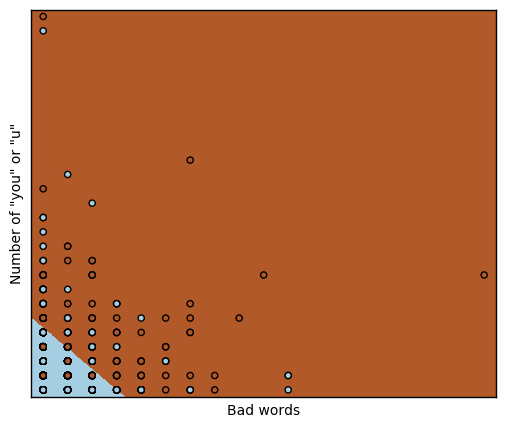

In [33]:
h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Bad words')
plt.ylabel('Number of "you" or "u"')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()